# Install

In [1]:
!pip install pandas matplotlib openpyxl lxml


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

# Reading data
- Load CSV file "https://raw.githubusercontent.com/bpampuch/1025/main/data/LoanData/train.csv"
    - `pd.read_csv(...)` 
-  Have a look at the initial records
    - `head()`
    
Everytime you need more guidance use `help` or `?`, e.g. `help(pd.read_csv)` / `pd.read_csv?` and run the cell

In [112]:
loan = pd.read_csv("https://raw.githubusercontent.com/bpampuch/1025/main/data/LoanData/train.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# First overview
- How many records and columns does the dataset have? 
- Do they have null values? 
    - `shape`

In [5]:
loan.shape

(614, 13)

- Do they have null values? 
- What are the data types in particular columns?
    - `info()`
    

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Descriptive statistics
- Get to know the data statistical info in numeric columns
    - `describe()`

In [7]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- For data with many columns sometimes it's better to transpose the statistics table
    - `describe().T`

In [113]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## Histogram
- Get to know the data "visually"
    * `hist(...)`
- Try different number of `bins=` and use `figsize=(x,y)` parameter to make your charts readable

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

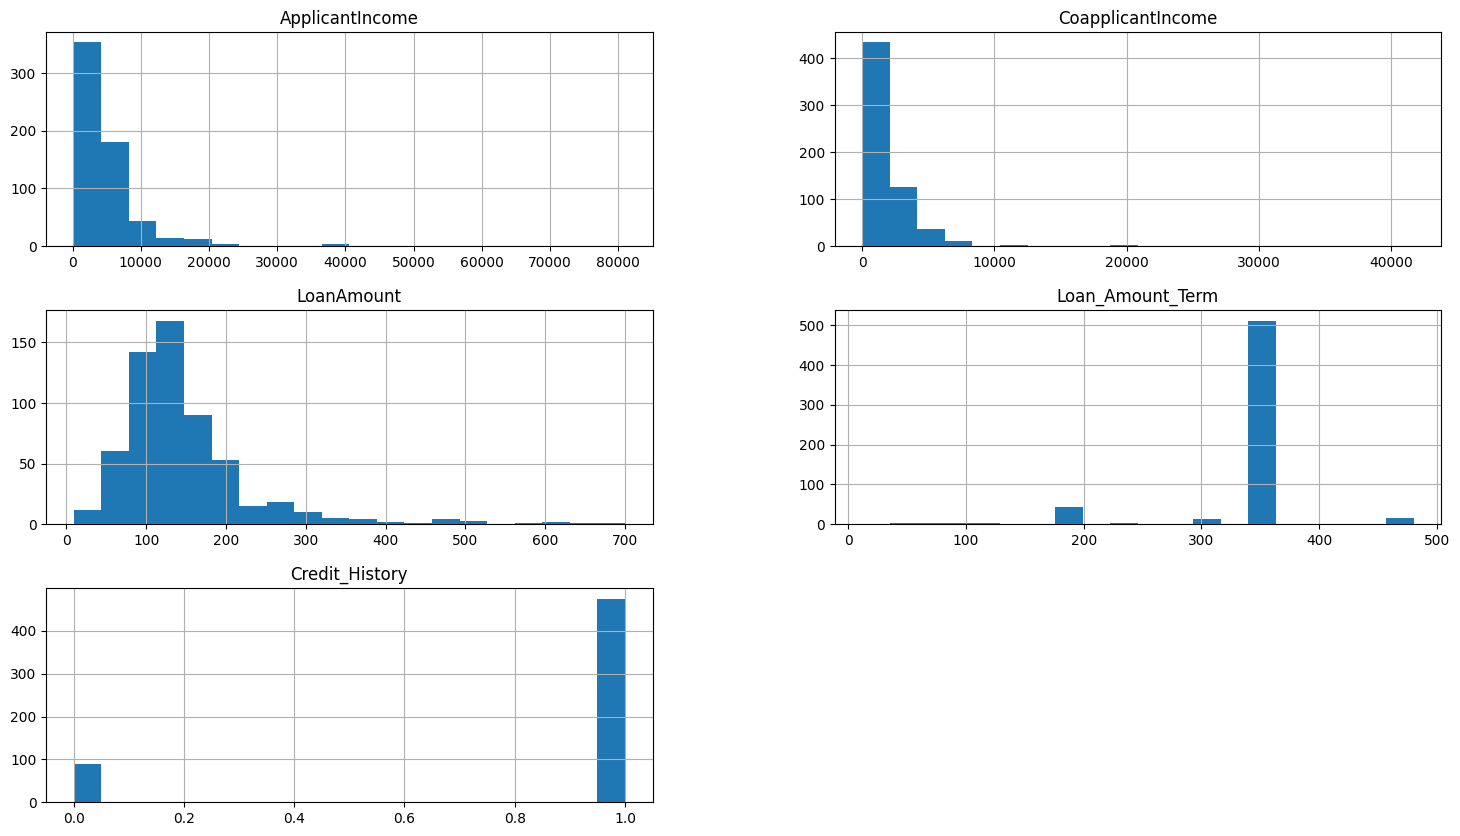

In [114]:
loan.hist(bins=20, figsize=(18,10))

## Pearson's r (correlations coefficients)

- Assess linear correlation between features - by analyzing Pearson's correlation coefficients
- Keep in mind it will not capture non-linear relationships though.
    - `corr(...)`

You may need to set `numeric_only=True` 

In [116]:
loan.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


Sort correlation values to be able to focus on extremes

In [117]:
loan.corr(numeric_only=True)["ApplicantIncome"].sort_values(ascending=False)

ApplicantIncome      1.000000
LoanAmount           0.570909
Credit_History      -0.014715
Loan_Amount_Term    -0.045306
CoapplicantIncome   -0.116605
Name: ApplicantIncome, dtype: float64

### Summed Income

Sometimes a new feature might be needed

In [13]:
loan["SummedIncome"] = loan["ApplicantIncome"] + loan["CoapplicantIncome"]
loan.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SummedIncome
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.015109
SummedIncome,0.893037,0.342781,0.624621,-0.069948,-0.015109,1.000000


## Counting Non-NA/null
- Nulls and Nans are bad
- Count non-null, non-nan items in particular columns
    - `count()`



In [14]:
loan.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
SummedIncome         614
dtype: int64

## Nulls
- turn all cell data into values that tell us if it's null or not
    - `isnull()`

In [15]:
loan.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False


- summing columns with boolean values sums `True`s
- check how many null cells are in each column by summing the above list
    - `isnull()`
    - `sum()`


In [16]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
SummedIncome          0
dtype: int64

## Sorting

Although we don't need sorting for now, it's good to know how to do it
- sort the dataset in both directions by a selected column
    - `sort_values(...)`
    - `ascending=` parameter

In [17]:
loan.sort_values("ApplicantIncome", ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,81000.0
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,63337.0
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,51763.0
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,39999.0
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,43897.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,5970.0
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y,4328.0
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,42083.0
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y,3127.0


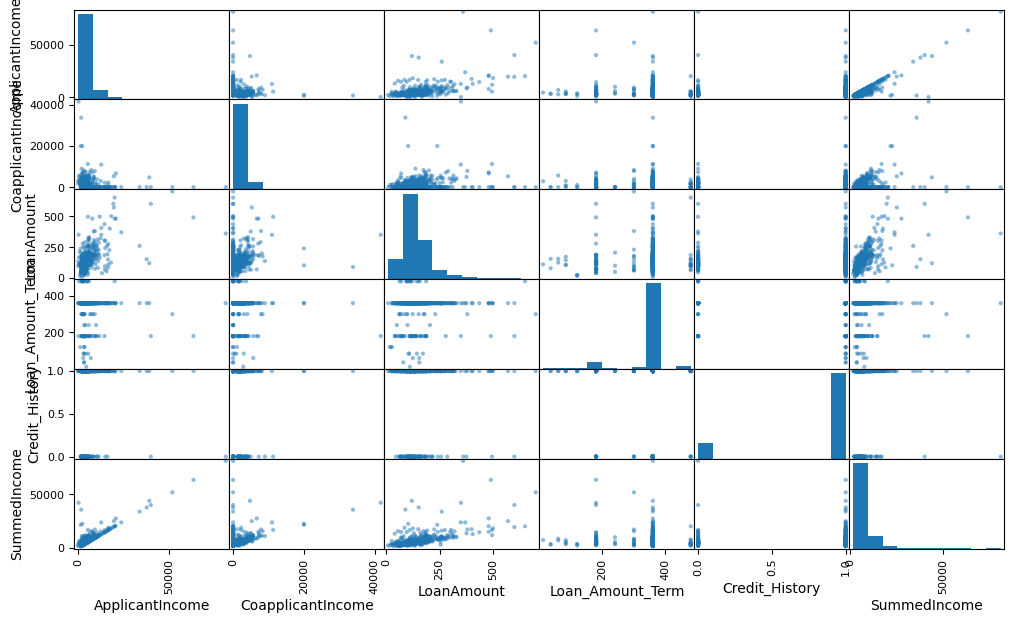

In [18]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(loan, figsize=(12, 7))

plt.show()

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

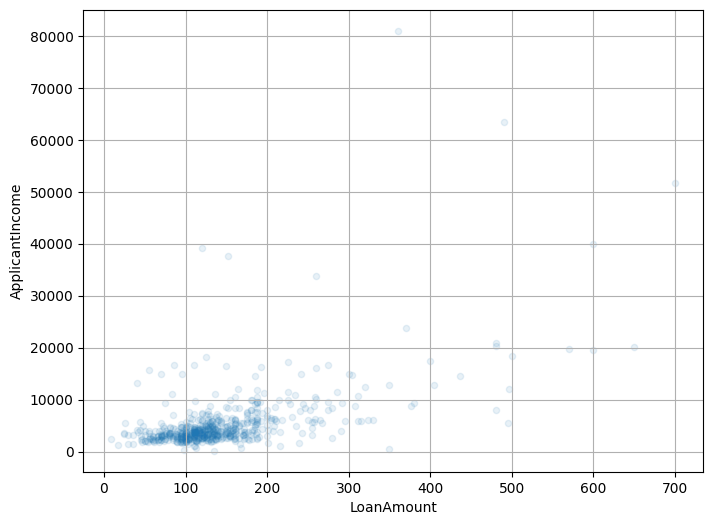

In [19]:
loan.plot(kind="scatter", x="LoanAmount", y="ApplicantIncome",
             alpha=0.1, grid=True, figsize=(8,6))

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

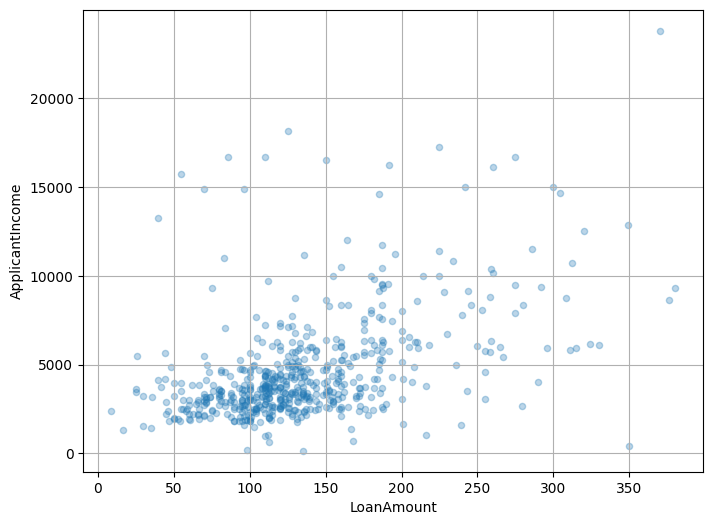

In [20]:
loan[(loan["LoanAmount"] < 400) & (loan["ApplicantIncome"] < 30000)].plot(kind="scatter", x="LoanAmount", y="ApplicantIncome",
             alpha=0.3, grid=True, figsize=(8,6))

# Querying
- Check what columns our dataset has:
    - `columns`


In [21]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'SummedIncome'],
      dtype='object')

## Series
### Basics
Two main Pandas Data structures are: **DataFrame** and **Series**

**DataFrame** is a 2D tabular data (your read file, or its subset), while **Series** is a 1D structure (e.g. a column)

You can retrieve a **Series** from a **DataFrame** with: `df["ColumnName"]` (assuming you have your dataset saved in the `df` variable.

- Retrieve a **Series** with data from "Property_Area"

In [22]:
loan["Property_Area"]

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

### Array of values

In [23]:
loan["Property_Area"].values

array(['Urban', 'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban',
       'Semiurban', 'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban',
       'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Rural', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Rural', 'Semiurban', 'Semiurban',
       'Semiurban', 'Urban', 'Urban', 'Semiurban', 'Urban', 'Urban',
       'Rural', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Urban',
       'Semiurban', 'Semiurban', 'Rural', 'Urban', 'Urban', 'Urban',
       'Urban', 'Rural', 'Rural', 'Semiurban', 'Semiurban', 'Urban',
       'Urban', 'Urban', 'Semiurban', 'Urban', 'Semiurban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Urban', 'Urban', 'Urban', 'Semiurban',
       'Semiurban', 'Semiurban', 'Semiurban', 'Urban', 'Semiurban',
       'Urban', 'Semiurban', '

### Unique values
Find all unique values in "Property_Unique", by calling `unique()` on the **Series**

In [24]:
loan["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

### Unique Value Counts
Check how many records we have with particular values in "Property_Area", by calling `value_counts()` on **Series**

In [25]:
loan["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

### Operations on Series
- retrieve a **Series** with numerical data from one column (e.g. "ApplicantIncome") and check their values
- see how arithmetic operators can be used on full series
    - e.g. `df["Column"] / 100`

In [26]:
loan["ApplicantIncome"]
loan["ApplicantIncome"] / 100

0      58.49
1      45.83
2      30.00
3      25.83
4      60.00
       ...  
609    29.00
610    41.06
611    80.72
612    75.83
613    45.83
Name: ApplicantIncome, Length: 614, dtype: float64

- use comparison operators directly on **Series** and see what happens with the values
- try with "ApplicantIncome" > 5000 or others

In [27]:
loan["ApplicantIncome"] > 5000

0       True
1      False
2      False
3      False
4       True
       ...  
609    False
610    False
611     True
612     True
613    False
Name: ApplicantIncome, Length: 614, dtype: bool

### Series as conditions

**Series** containing boolean values can be used to filter **DataFrames**, by using `df[filtered_series]`. 
E.g. 
```python
incomeOver100 = df["Income"] > 100
df[incomeOver100]
```

Filter records that have "ApplicantIncome" > 5000


In [28]:
loan[loan["ApplicantIncome"] > 5000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,7660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y,5780.0
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,5703.0
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,12000.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0


### Multiple conditions
Series with boolean values can be combined using `&` (for and) and `|` (for or). 

- Let's find records where both Applicant and Coapplicant earn more than 5000 (ApplicantIncome > 5000 AND CoapplicantIncome > 5000)
- create two Series (one for ApplicantIncome > 5000, the other for CoapplicantIncome > 5000)
- save them in two different variables (e.g. `applicantEarnsMuch`, `applicantEarnsMuch`)
- filter dataset with both of them
    - `df[applicantEarnsMuch & applicantEarnsMuch]`
- test other conditions

**Warning!**
- If you use don't use intermediate variables, but rather type conditions directly while filtering, make sure to use parentheses, otherwise the order of operators will break the code
    - **OK_**:  `df[(df["Column"] > 5000) & (df["Column2"] < 7000)]`
    - **BAD**: `df[df["Column"] > 5000 & df["Column2"] < 7000]`


In [29]:
applicantIncomeLarge = loan["ApplicantIncome"] > 5000
coapplicantIncomeLarge = loan["CoapplicantIncome"] > 5000

bothIncomesLarge = applicantIncomeLarge & coapplicantIncomeLarge
loan[bothIncomesLarge]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,11580.0
91,LP001318,Male,Yes,2,Graduate,No,6250,5654.0,188.0,180.0,1.0,Semiurban,Y,11904.0
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y,11333.0
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,16816.0
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N,13650.0
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,24996.0
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y,17196.0
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y,15666.0
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y,27500.0


Now find records where at least one applicant earns above 5000 (ApplicantIncome > 5000 OR CoapplicationIncome > 5000)

In [30]:
anyOfIncomesLarge = applicantIncomeLarge | coapplicantIncomeLarge
loan[anyOfIncomesLarge]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,11179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,42083.0
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,5703.0
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y,12000.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0


### Order of operators

In [31]:
#loan[loan["ApplicantIncome"] > 5000 & loan["CoapplicantIncome"] > 5000]
loan[(loan["ApplicantIncome"] > 5000) & (loan["CoapplicantIncome"] > 5000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y,11580.0
91,LP001318,Male,Yes,2,Graduate,No,6250,5654.0,188.0,180.0,1.0,Semiurban,Y,11904.0
173,LP001594,Male,Yes,0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y,11333.0
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,16816.0
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N,13650.0
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,24996.0
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y,17196.0
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y,15666.0
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y,27500.0


## Retrieving a DataFrame

First retrieve a **Series** with data from column "Gender"

In [32]:
loan["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

Check what happens when you change `["ColumnName"]` to `[["ColumnName"]]` (double square brackets)

Instead of a **Series** you get a **DataFrame** with one column

In [33]:
loan[["Gender"]]

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
609,Female
610,Male
611,Male
612,Male


## Getting a DataFrame with multiple columns

But there's nothing that stops you from getting more than one column when you build a **DataFrame**

`df[["Col1", "Col2", "Col3"]]`

Retrieve a DataFrame with a few columns.

In [34]:
loan[["Gender", "Married", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount
0,Male,No,5849,0.0,NaN
1,Male,Yes,4583,1508.0,128.0
2,Male,Yes,3000,0.0,66.0
3,Male,Yes,2583,2358.0,120.0
4,Male,No,6000,0.0,141.0
...,...,...,...,...,...
609,Female,No,2900,0.0,71.0
610,Male,Yes,4106,0.0,40.0
611,Male,Yes,8072,240.0,253.0
612,Male,Yes,7583,0.0,187.0


## Array of arrays with rows

In [35]:
loan[["Property_Area", "ApplicantIncome"]].values

array([['Urban', 5849],
       ['Rural', 4583],
       ['Urban', 3000],
       ...,
       ['Urban', 8072],
       ['Urban', 7583],
       ['Semiurban', 4583]], dtype=object)

In [36]:
loan[["Property_Area", "ApplicantIncome"]]

,Property_Area,ApplicantIncome
0,Urban,5849
1,Rural,4583
2,Urban,3000
3,Urban,2583
4,Urban,6000
...,...,...
609,Rural,2900
610,Rural,4106
611,Urban,8072
612,Urban,7583


## Selecting rows

Rows can be filtered using ranges with their indexes (e.g. `df[10:15]`)

Filter a short range of records from the dataset. Is range inclusive on right side?

In [37]:
loan[10:15]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y,3900.0
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,4340.0
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y,11179.0
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,4693.0
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y,2385.0


## Selecting rows and columns

Retrieve a **DataRange** with a few selected columns and use range on the result to get a few records

In [38]:
loan[["Gender", "Married", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"]][10:15]

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount
10,Male,Yes,3200,700.0,70.0
11,Male,Yes,2500,1840.0,109.0
12,Male,Yes,3073,8106.0,200.0
13,Male,No,1853,2840.0,114.0
14,Male,Yes,1299,1086.0,17.0


## loc - as a single query

Method **loc** allows limiting both rows and columns in a single operation 

- `df.loc[<rowRange>, [<columns>]]`,
- e.g.: `df.loc[10:15, ["Col1", "Col2"]]`

Using **loc** retrieve records with indexes 10-15 and select columns "Gender", "Married", "ApplicantIncome", "CoapplicantIncome"

Is the range inclusive on the right side? With **loc** it's not index-based anymore, but value-based. (10, 11, 12 are labels).

In [39]:
loan.loc[10:15, ["Gender", "Married", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount
10,Male,Yes,3200,700.0,70.0
11,Male,Yes,2500,1840.0,109.0
12,Male,Yes,3073,8106.0,200.0
13,Male,No,1853,2840.0,114.0
14,Male,Yes,1299,1086.0,17.0
15,Male,No,4950,0.0,125.0


In [41]:
df = pd.DataFrame({"Name": ["A", "C", "D", "B"], "Age": [1, 2, 3, 4]})
df.index = df["Name"].values
df.loc["A":"D"]

,Name,Age
A,A,1
C,C,2
D,D,3


## iloc

**iloc** is very simlar to **loc**, but works on indexes rather than labels

    - e.g. `df.iloc[10:15, 3:7]`

* select a few rows and few columns
* check if the range is inclusive on the right side? This time it's again index-based, not label-based

In [42]:
loan.iloc[10:15, 3:7]

,Dependents,Education,Self_Employed,ApplicantIncome
10,2,Graduate,No,3200
11,2,Graduate,NaN,2500
12,2,Graduate,No,3073
13,0,Graduate,No,1853
14,2,Graduate,No,1299


# Grouping

We want to verify what's the average applicant income ("ApplicantIncome") for all neighbourhoods ("Property_Area")

Grouping can be made using
`df.groupby("<column_name>")["<column_to_aggregate">].<aggregate_function>()`

Group by Property_Area and calculate mean for "ApplicantIncome"

In [43]:
loan.groupby('Property_Area')["ApplicantIncome"].mean()

Property_Area
Rural        5554.083799
Semiurban    5292.261803
Urban        5398.247525
Name: ApplicantIncome, dtype: float64

Now let's verify what's the average Applicant Income by gender

In [44]:
loan.groupby('Gender')["ApplicantIncome"].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

Let's check if this relation also exists for people with higher salaries?

Filter the dataset to have only people who earn more than 5000 and then do the grouping and aggregation

In [45]:
high_income = loan['ApplicantIncome'] > 5000
loan[high_income].groupby('Gender')["ApplicantIncome"].mean()

Gender
Female    10502.409091
Male       9868.018293
Name: ApplicantIncome, dtype: float64

## Aggregates
Sometimes we need more aggregated values for a single column.

`df.groupby('Column1').agg({ 'ColumnName4': ['mean', 'max', 'min'] })`

Calculate mean, max and min for ApplicantIncome, grouped by Gender

In [46]:
loan.groupby('Gender').agg({ 'ApplicantIncome': ['mean', 'max', 'min'] })

ApplicantIncome            
                  mean    max  min
Gender                            
Female     4643.473214  19484  210
Male       5446.460123  81000  150

## Grouping by multiple columns

Grouping can be hierarchical. Let's group by Property_Area and then Gender.

`df.groupby(["Col1", "Col2"]).agg(...)`

In [47]:
loan.groupby(["Property_Area", 'Gender']).agg({ 'ApplicantIncome': ['mean', 'max', 'min'] })

ApplicantIncome             
                                mean    max   min
Property_Area Gender                             
Rural         Female     4353.375000  10000   645
              Male       5691.291391  81000   150
Semiurban     Female     4787.272727  19484   210
              Male       5412.529070  39999  1668
Urban         Female     4614.787879  18165   416
              Male       5258.909639  63337  1000

## Extending groups (e.g. Ratio)

In [48]:
loan["is_self_employed"] = loan["Self_Employed"].str.startswith("Y")

loan.groupby("Gender")['is_self_employed'].sum()
# loan.groupby('Gender').agg({ 'Credit_History': ['sum', 'count'] })

Gender
Female    15
Male      63
Name: is_self_employed, dtype: object

`sum` returns the number of `True` values, while `count` - all items in a group

In [49]:
grouped = loan.groupby("Gender").agg({ 'is_self_employed': ['sum', 'count'] })
grouped

is_self_employed      
                    sum count
Gender                       
Female               15   104
Male                 63   465

In [117]:
type(grouped)

pandas.core.frame.DataFrame

# Pivots

Try pivoting table by using `df.pivot(index="Col1", columns["Col2, "Co32"])`

To show All Columns, change max_columns config using
`pd.set_option('display.max_columns', 60)`

In [50]:
pd.set_option('display.max_columns', 60)
loan.pivot(index="Loan_ID", columns=['Gender', 'Married'])

Dependents                                          Education  \
Gender         Male      Female  NaN Female Male Female  NaN      Male   
Married          No  Yes     No  Yes    Yes  NaN    NaN   No        No   
Loan_ID                                                                  
LP001002          0  NaN    NaN  NaN    NaN  NaN    NaN  NaN  Graduate   
LP001003        NaN    1    NaN  NaN    NaN  NaN    NaN  NaN       NaN   
LP001005        NaN    0    NaN  NaN    NaN  NaN    NaN  NaN       NaN   
LP001006        NaN    0    NaN  NaN    NaN  NaN    NaN  NaN       NaN   
LP001008          0  NaN    NaN  NaN    NaN  NaN    NaN  NaN  Graduate   
...             ...  ...    ...  ...    ...  ...    ...  ...       ...   
LP002978        NaN  NaN      0  NaN    NaN  NaN    NaN  NaN       NaN   
LP002979        NaN   3+    NaN  NaN    NaN  NaN    NaN  NaN       NaN   
LP002983        NaN    1    NaN  NaN    NaN  NaN    NaN  NaN       NaN   
LP002984        NaN    2    NaN  NaN    NaN  NaN    NaN  NaN       NaN   
LP002990        NaN  NaN      0  NaN    NaN  NaN    NaN  NaN       NaN   

                                                              Self_Employed  \
Gender                    Female  NaN Female Male Female  NaN          Male   
Married            Yes        No  Yes    Yes  NaN    NaN   No            No   
Loan_ID                                                                       
LP001002           NaN       NaN  NaN    NaN  NaN    NaN  NaN            No   
LP001003      Graduate       NaN  NaN    NaN  NaN    NaN  NaN           NaN   
LP001005      Graduate       NaN  NaN    NaN  NaN    NaN  NaN           NaN   
LP001006  Not Graduate       NaN  NaN    NaN  NaN    NaN  NaN           NaN   
LP001008           NaN       NaN  NaN    NaN  NaN    NaN  NaN            No   
...                ...       ...  ...    ...  ...    ...  ...           ...   
LP002978           NaN  Graduate  NaN    NaN  NaN    NaN  NaN           NaN   
LP002979      Graduate       NaN  NaN    NaN  NaN    NaN  NaN           NaN   
LP002983      Graduate       NaN  NaN    NaN  NaN    NaN  NaN           NaN   
LP002984      Graduate       NaN  NaN    NaN  NaN    NaN  NaN           NaN   
LP002990           NaN  Graduate  NaN    NaN  NaN    NaN  NaN           NaN   

                                                  ApplicantIncome          \
Gender        Female  NaN Female Male Female  NaN            Male           
Married   Yes     No  Yes    Yes  NaN    NaN   No              No     Yes   
Loan_ID                                                                     
LP001002  NaN    NaN  NaN    NaN  NaN    NaN  NaN          5849.0     NaN   
LP001003   No    NaN  NaN    NaN  NaN    NaN  NaN             NaN  4583.0   
LP001005  Yes    NaN  NaN    NaN  NaN    NaN  NaN             NaN  3000.0   
LP001006   No    NaN  NaN    NaN  NaN    NaN  NaN             NaN  2583.0   
LP001008  NaN    NaN  NaN    NaN  NaN    NaN  NaN          6000.0     NaN   
...       ...    ...  ...    ...  ...    ...  ...             ...     ...   
LP002978  NaN     No  NaN    NaN  NaN    NaN  NaN             NaN     NaN   
LP002979   No    NaN  NaN    NaN  NaN    NaN  NaN             NaN  4106.0   
LP002983   No    NaN  NaN    NaN  NaN    NaN  NaN             NaN  8072.0   
LP002984   No    NaN  NaN    NaN  NaN    NaN  NaN             NaN  7583.0   
LP002990  NaN    Yes  NaN    NaN  NaN    NaN  NaN             NaN     NaN   

                                  ... Property_Area                          \
Gender    Female NaN Female Male  ...        Female  NaN Female Male Female   
Married       No Yes    Yes  NaN  ...            No  Yes    Yes  NaN    NaN   
Loan_ID                           ...                                         
LP001002     NaN NaN    NaN  NaN  ...           NaN  NaN    NaN  NaN    NaN   
LP001003     NaN NaN    NaN  NaN  ...           NaN  NaN    NaN  NaN    NaN   
LP001005     NaN NaN    NaN  NaN  ...           NaN  NaN    NaN  NaN    NaN   
LP0

# Extending data

- check how two **Series** can be added together to create a new **Series**
- create a **Series** with ApplicantIncome and another one with CoapplicantIncome and add them to get total income

In [51]:
loan['ApplicantIncome'] + loan['CoapplicantIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Length: 614, dtype: float64

DataFrames can be extended easily with new, calculated columns. 

- Create a column named TotalIncome which sums ApplicantIncome and CoapplicantIncome

    `df["NextColumn"] = df["Col1"] + df["Col2]`

In [52]:
loan["TotalIncome"] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome,is_self_employed,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,False,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,False,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,False,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,False,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,False,7583.0


# Buckets

- Cut data from one column into buckets (bins)
    - `pd.cut(...)`
    - use `bins` to describe bin edge values

In [53]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SummedIncome,TotalIncome
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000,81000.000000


In [54]:
import numpy as np
pd.cut(loan['TotalIncome'], bins=[0, 2000, 3000, 5000, 7000, 8000, np.inf])

0      (5000.0, 7000.0]
1      (5000.0, 7000.0]
2      (2000.0, 3000.0]
3      (3000.0, 5000.0]
4      (5000.0, 7000.0]
             ...       
609    (2000.0, 3000.0]
610    (3000.0, 5000.0]
611       (8000.0, inf]
612    (7000.0, 8000.0]
613    (3000.0, 5000.0]
Name: TotalIncome, Length: 614, dtype: category
Categories (6, interval[float64, right]): [(0.0, 2000.0] < (2000.0, 3000.0] < (3000.0, 5000.0] < (5000.0, 7000.0] < (7000.0, 8000.0] < (8000.0, inf]]

Add a new column "IncomeBin" containing the name of the assigned bin (bins from selected step)

In [55]:
loan["IncomeBin"] = pd.cut(loan['TotalIncome'], bins=[0, 2000, 3000, 5000, 7000, 8000, np.inf])
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome,is_self_employed,TotalIncome,IncomeBin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,5849.0,"(5000.0, 7000.0]"
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,False,6091.0,"(5000.0, 7000.0]"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,3000.0,"(2000.0, 3000.0]"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,4941.0,"(3000.0, 5000.0]"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,6000.0,"(5000.0, 7000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,False,2900.0,"(2000.0, 3000.0]"
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,False,4106.0,"(3000.0, 5000.0]"
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,False,8312.0,"(8000.0, inf]"
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,False,7583.0,"(7000.0, 8000.0]"


Let's see what's the average load amount term in each bin. `groupby` by IncomeBin, select `Load_Amount_Term` column and calculate `mean`

In [57]:
loan.groupby("IncomeBin")["Loan_Amount_Term"].mean()

/var/folders/71/tmhbm1rx1nbbzb1wd5hhn0ch0000gn/T/ipykernel_5333/910174582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby("IncomeBin")["Loan_Amount_Term"].mean()


IncomeBin
(0.0, 2000.0]       360.000000
(2000.0, 3000.0]    351.000000
(3000.0, 5000.0]    343.211009
(5000.0, 7000.0]    346.690909
(7000.0, 8000.0]    320.857143
(8000.0, inf]       337.209302
Name: Loan_Amount_Term, dtype: float64

- Plot the data from previous step on chart
    - `previousStep.plot.bar()`
    - change `figsize=` according top your needs

/var/folders/71/tmhbm1rx1nbbzb1wd5hhn0ch0000gn/T/ipykernel_5333/1739442390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan.groupby("IncomeBin")["Loan_Amount_Term"].mean().plot.bar(figsize=(10,3))


<Axes: xlabel='IncomeBin'>

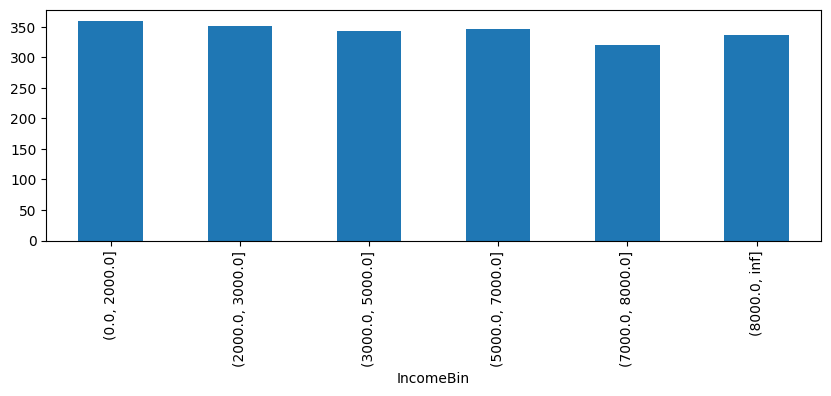

In [58]:
loan.groupby("IncomeBin")["Loan_Amount_Term"].mean().plot.bar(figsize=(10,3))

# Mapping column to numerical categories


## Manually

In [59]:
loan["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [60]:
categories = { "Urban": 100, "Rural": 300, "Semiurban": 800 }

loan["Property_Area_Category"] = loan["Property_Area"].map(categories)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome,is_self_employed,TotalIncome,IncomeBin,Property_Area_Category
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,5849.0,"(5000.0, 7000.0]",100
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,False,6091.0,"(5000.0, 7000.0]",300
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,3000.0,"(2000.0, 3000.0]",100
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,4941.0,"(3000.0, 5000.0]",100
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,6000.0,"(5000.0, 7000.0]",100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,False,2900.0,"(2000.0, 3000.0]",300
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,False,4106.0,"(3000.0, 5000.0]",300
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,False,8312.0,"(8000.0, inf]",100
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,False,7583.0,"(7000.0, 8000.0]",100


## factorize

In [61]:
pd.factorize(loan["Property_Area"])  # returns tuple

(array([0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2,
        0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2,
        0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0,
        2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1,
        0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1,
        1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0,
        2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2,
        0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0,
        0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
        2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1,
        2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 

In [62]:
loan["Factorized_Area"] = pd.factorize(loan["Property_Area"])[0]
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome,is_self_employed,TotalIncome,IncomeBin,Property_Area_Category,Factorized_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,5849.0,"(5000.0, 7000.0]",100,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,False,6091.0,"(5000.0, 7000.0]",300,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,3000.0,"(2000.0, 3000.0]",100,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,4941.0,"(3000.0, 5000.0]",100,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,6000.0,"(5000.0, 7000.0]",100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,False,2900.0,"(2000.0, 3000.0]",300,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,False,4106.0,"(3000.0, 5000.0]",300,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,False,8312.0,"(8000.0, inf]",100,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,False,7583.0,"(7000.0, 8000.0]",100,0


## Category mappings from data

In [63]:
mapping = loan[["Factorized_Area", "Property_Area"]].drop_duplicates()
mapping

,Factorized_Area,Property_Area
0,0,Urban
1,1,Rural
7,2,Semiurban


In [64]:
mapping_dict = mapping.to_dict()
mapping_dict

{'Factorized_Area': {0: 0, 1: 1, 7: 2},
 'Property_Area': {0: 'Urban', 1: 'Rural', 7: 'Semiurban'}}

In [65]:
mapping_list = list(zip(mapping_dict["Factorized_Area"].values(), mapping_dict["Property_Area"].values()))
mapping_list

[(0, 'Urban'), (1, 'Rural'), (2, 'Semiurban')]

In [66]:
{val: cat for val, cat in mapping_list}

{0: 'Urban', 1: 'Rural', 2: 'Semiurban'}

# Mapping column to one-hot-encoding

## get_dummies

In [67]:
one_hot = pd.get_dummies(loan["Property_Area"])

print(one_hot)

one_hot.astype(float).values

     Rural  Semiurban  Urban
0    False      False   True
1     True      False  False
2    False      False   True
3    False      False   True
4    False      False   True
..     ...        ...    ...
609   True      False  False
610   True      False  False
611  False      False   True
612  False      False   True
613  False       True  False

[614 rows x 3 columns]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [68]:
pd.concat([loan, one_hot], axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,SummedIncome,is_self_employed,TotalIncome,IncomeBin,Property_Area_Category,Factorized_Area,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,5849.0,"(5000.0, 7000.0]",100,0,False,False,True
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,False,6091.0,"(5000.0, 7000.0]",300,1,True,False,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,True,3000.0,"(2000.0, 3000.0]",100,0,False,False,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,False,4941.0,"(3000.0, 5000.0]",100,0,False,False,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,6000.0,"(5000.0, 7000.0]",100,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,False,2900.0,"(2000.0, 3000.0]",300,1,True,False,False
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,False,4106.0,"(3000.0, 5000.0]",300,1,True,False,False
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,False,8312.0,"(8000.0, inf]",100,0,False,False,True
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,False,7583.0,"(7000.0, 8000.0]",100,0,False,False,True


## Sklearn - OneHotEncoder

In [69]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
loan_area_encoded = cat_encoder.fit_transform(loan[["Property_Area"]])
print(cat_encoder.categories_)
loan_area_encoded.toarray()

[array(['Rural', 'Semiurban', 'Urban'], dtype=object)]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Time Series Analysis

## Date / time index

In [71]:
weather = pd.read_csv("https://raw.githubusercontent.com/bpampuch/1025/main/data/weather_2012.csv")
weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [72]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB



Date/Time doesn't seem to be recognized as DateTime.

Let's point pandas to parse it via `parse_dates=` and let's set this column as index field.


In [74]:
weather = pd.read_csv("https://raw.githubusercontent.com/bpampuch/1025/main/data/weather_2012.csv", parse_dates=["Date/Time"], index_col="Date/Time")
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temp (C)            8784 non-null   float64
 1   Dew Point Temp (C)  8784 non-null   float64
 2   Rel Hum (%)         8784 non-null   int64  
 3   Wind Spd (km/h)     8784 non-null   int64  
 4   Visibility (km)     8784 non-null   float64
 5   Stn Press (kPa)     8784 non-null   float64
 6   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB


In [75]:
weather

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


## Chart Analysis

<Axes: xlabel='Date/Time'>

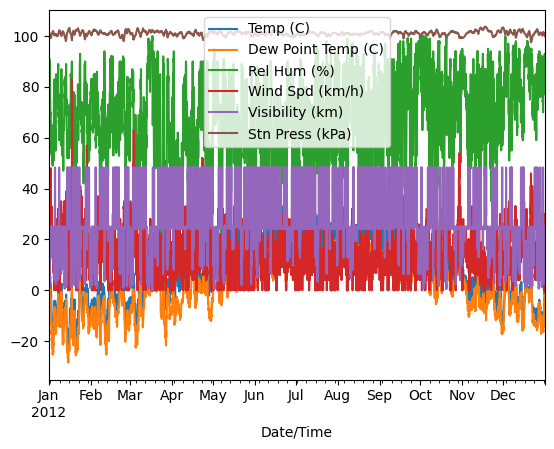

In [76]:
weather.plot()

<Axes: xlabel='Date/Time'>

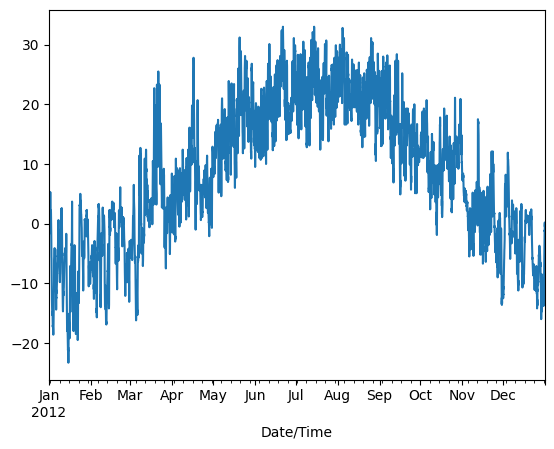

In [77]:
weather["Temp (C)"].plot()

## Resampling

In [78]:
resampled = weather["Temp (C)"].resample("M").mean()
resampled
# .plot.bar()

Date/Time
2012-01-31    -7.371505
2012-02-29    -4.225000
2012-03-31     3.121237
2012-04-30     7.009306
2012-05-31    16.237769
2012-06-30    20.134028
2012-07-31    22.790054
2012-08-31    22.279301
2012-09-30    16.484444
2012-10-31    10.954973
2012-11-30     0.931389
2012-12-31    -3.306317
Freq: M, Name: Temp (C), dtype: float64

In [79]:
resampled.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dev"]
resampled

Jan    -7.371505
Feb    -4.225000
Mar     3.121237
Apr     7.009306
May    16.237769
Jun    20.134028
Jul    22.790054
Aug    22.279301
Sep    16.484444
Oct    10.954973
Nov     0.931389
Dev    -3.306317
Name: Temp (C), dtype: float64

<Axes: >

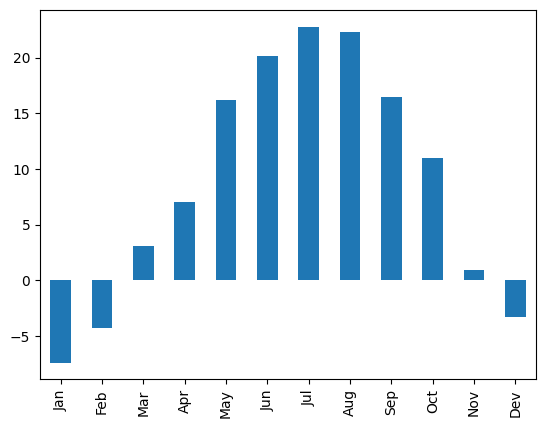

In [80]:
resampled.plot.bar()

## Changing time dimension

In [81]:
weather.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date/Time', length=8784, freq=None)

In [82]:
weather.index.hour

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype='int32', name='Date/Time', length=8784)

In [83]:
weather["Hour"] = weather.index.hour
weather

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Hour
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,19
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,20
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,21


<Axes: xlabel='Hour'>

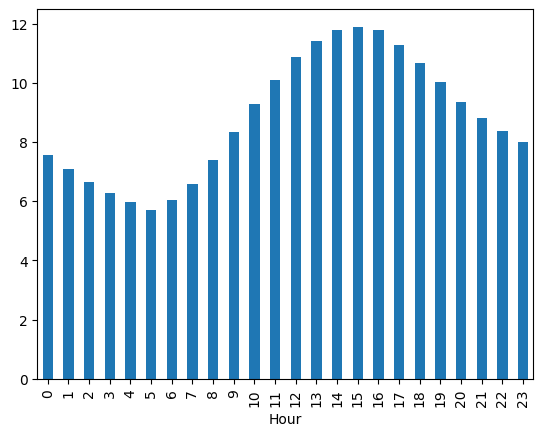

In [84]:
weather.groupby('Hour')['Temp (C)'].mean().plot.bar()

<Axes: >

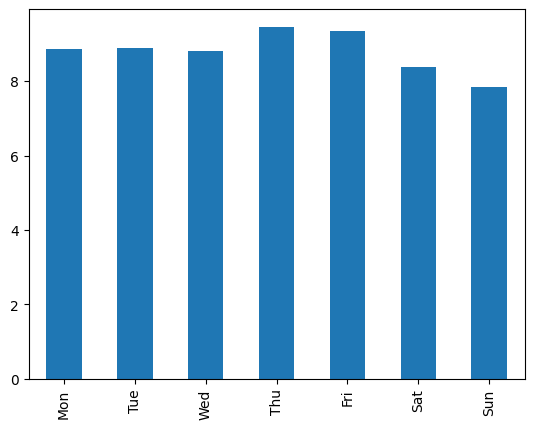

In [85]:
weather["DoW"] = weather.index.weekday
grouped = weather.groupby('DoW')['Temp (C)'].mean()
# grouped.mean()
grouped.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
grouped.plot.bar()

## Extending visible columns

In [86]:
pd.set_option?
pd.set_option("display.max_columns", 60)

Signature:   pd.set_option(*args, **kwds) -> 'T'
Type:        CallableDynamicDoc
String form: <pandas._config.config.CallableDynamicDoc object at 0x104b257e0>
File:        ~/src/blinkin/llm/venv/lib/python3.10/site-packages/pandas/_config/config.py
Docstring:  
set_option(pat, value)

Sets the value of the specified option.

Available options:

- compute.[use_bottleneck, use_numba, use_numexpr]
- display.[chop_threshold, colheader_justify, date_dayfirst, date_yearfirst,
  encoding, expand_frame_repr, float_format]
- display.html.[border, table_schema, use_mathjax]
- display.[large_repr, max_categories, max_columns, max_colwidth, max_dir_items,
  max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
  min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
  show_dimensions]
- display.unicode.[ambiguous_as_wide, east_asian_width]
- display.[width]
- future.[infer_string]
- io.excel.ods.[reader, writer]
- io.excel.xls.[reader]
- io.excel.xlsb.[reader]


## String Data

In [87]:
weather.head()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Hour,DoW
Date/Time,,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0,6
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,6
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,6
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,6
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4,6


In [88]:
weather["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [89]:
weather["Weather"].str.contains("Snow")

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
                       ...  
2012-12-31 19:00:00     True
2012-12-31 20:00:00     True
2012-12-31 21:00:00     True
2012-12-31 22:00:00     True
2012-12-31 23:00:00     True
Name: Weather, Length: 8784, dtype: bool

In [90]:
weather["Snowing"] = weather["Weather"].str.contains("Snow")
weather["Snowing"]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
                       ...  
2012-12-31 19:00:00     True
2012-12-31 20:00:00     True
2012-12-31 21:00:00     True
2012-12-31 22:00:00     True
2012-12-31 23:00:00     True
Name: Snowing, Length: 8784, dtype: bool

<Axes: xlabel='Date/Time'>

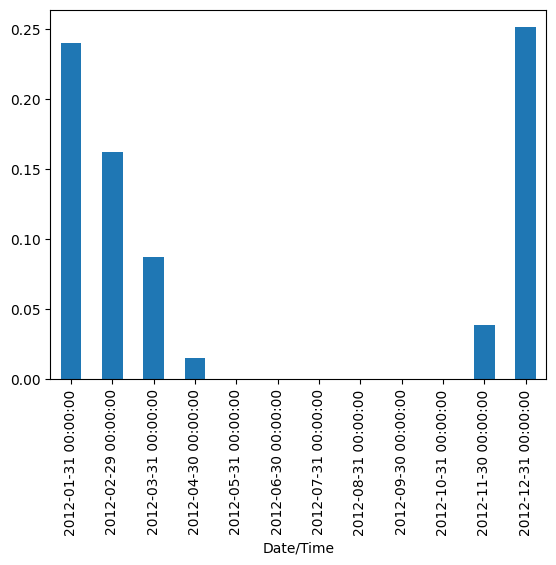

In [91]:
weather["Snowing"].resample("M").mean().plot.bar()

### Subplots

array([<Axes: title={'center': 'Snowing'}, xlabel='Date/Time'>,
       <Axes: title={'center': 'Raining'}, xlabel='Date/Time'>],
      dtype=object)

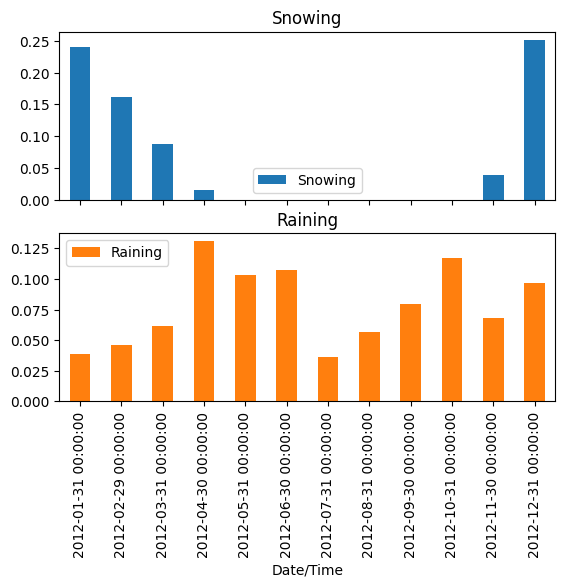

In [94]:
weather["Raining"] = weather["Weather"].str.contains("Rain")

snowing_means = weather["Snowing"].resample("M").mean()
raining_means = weather["Raining"].resample("M").mean()

pd.concat([snowing_means, raining_means], axis=1).plot.bar(subplots=True)

# Data Cleaning

In [492]:
loan = pd.read_csv("./LoanData/train.csv")

## Fixing data types

## Duplicates

In [191]:
loan.duplicated().sum()

0

In [119]:
loan = loan.drop_duplicates()
loan

# using subset as parameter is also possible

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Looking for invalid data

In [193]:
loan[(loan["ApplicantIncome"] < 0) | (loan["CoapplicantIncome"] < 0)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_Category,Factorized_Area


## Handling missing data


### Dropping entire feature

In [ ]:
# housing.drop("Dependents", axis=1)

### Dropping

In [76]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
IncomeBin             0
dtype: int64

In [453]:
dropped_na = loan.dropna()
dropped_na.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [454]:
dropped_na = loan.dropna(subset=["Gender", "Married"])
dropped_na.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

### Filling

In [455]:
dropped_na.loc[:, 'LoanAmount'] = dropped_na['LoanAmount'].fillna(0)
dropped_na.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [457]:
dropped_na.loc[:, 'Self_Employed'] = dropped_na['Self_Employed'].fillna("No")
dropped_na.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

### Filling with statistical measures

In [461]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 26.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 67.2 MB/s eta 0:00:000:00:01m eta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [464]:
loan["Dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [79]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # median
imputer.fit_transform(loan)

# numeric_columns = loan.select_dtypes(np.number)
# imputer.fit_transform(numeric_columns)


array([['LP001002', 'Male', 'No', ..., 'Y', 5849.0,
        Interval(5000.0, 7000.0, closed='right')],
       ['LP001003', 'Male', 'Yes', ..., 'N', 6091.0,
        Interval(5000.0, 7000.0, closed='right')],
       ['LP001005', 'Male', 'Yes', ..., 'Y', 3000.0,
        Interval(2000.0, 3000.0, closed='right')],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 'Y', 8312.0,
        Interval(8000.0, inf, closed='right')],
       ['LP002984', 'Male', 'Yes', ..., 'Y', 7583.0,
        Interval(7000.0, 8000.0, closed='right')],
       ['LP002990', 'Female', 'No', ..., 'N', 4583.0,
        Interval(3000.0, 5000.0, closed='right')]], dtype=object)

In [477]:
loan_imputed = pd.DataFrame(imputer.fit_transform(loan), columns=loan.columns)
loan_imputed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [478]:
loan_imputed.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling imbalanced data

### Undersampling

In [194]:
loan["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [555]:
male = loan[loan["Gender"] == 'Male']
female = loan[loan["Gender"] == 'Female']

male_undersampled = male.sample(len(female))

print("Male:", len(male), "Female:", len(female), "Male undersampled:", len(male_undersampled))

Male: 489 Female: 112 Male undersampled: 112


### Oversampling

In [197]:
male = loan[loan["Gender"] == 'Male']
female = loan[loan["Gender"] == 'Female']

female_oversampled = male.sample(len(male), replace=True)

print("Male:", len(male), "Female:", len(female), "Female oversampled:", len(female_oversampled))

Male: 489 Female: 112 Female oversampled: 489


### SMOTE (Synthetic Minority Over-sampling TEchnique)
A problem with over-sampling is that by making exact copies of the under-represented class, the model may overfit. SMOTE is an oversampling method which creates "synthetic" examples rather than creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.

In [561]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [563]:
# https://imbalanced-learn.org/stable/references/under_sampling.html

## Broken encoding

# Data Frames

## Series concatenation

In [95]:
married_series = loan["Married"]
married_series

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [96]:
gender_series = loan["Gender"]
gender_series

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [97]:
pd.concat([married_series, gender_series])

0          No
1         Yes
2         Yes
3         Yes
4          No
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Length: 1228, dtype: object

In [98]:
pd.concat([married_series, gender_series], axis=1)

,Married,Gender
0,No,Male
1,Yes,Male
2,Yes,Male
3,Yes,Male
4,No,Male
...,...,...
609,No,Female
610,Yes,Male
611,Yes,Male
612,Yes,Male


In [99]:
married_series.name="Is Married"
pd.concat([married_series, gender_series], axis=1)

,Is Married,Gender
0,No,Male
1,Yes,Male
2,Yes,Male
3,Yes,Male
4,No,Male
...,...,...
609,No,Female
610,Yes,Male
611,Yes,Male
612,Yes,Male


## From data and list of columns

In [100]:
data = [['Bartek', 43, 'Cracow'], ['Ann', 37, 'New York']]
columns = ['Name', 'Age', 'City']

pd.DataFrame(data, columns=columns)

,Name,Age,City
0,Bartek,43,Cracow
1,Ann,37,New York


## From dict

In [101]:
data = {
    "Name": ['Bartek', 'Ann'],
    "Age": [43, 37],
    "City": ['Cracow', 'New York']
}

pd.DataFrame(data)

,Name,Age,City
0,Bartek,43,Cracow
1,Ann,37,New York


## HTML tables

In [102]:
df = pd.read_html('https://en.wikipedia.org/wiki/National_Basketball_Association')
df[5]

,Teams,Win,Loss,Total,Year(s) won,Year(s) runner-up
0,Minneapolis/Los Angeles Lakers,17,15,32,"1949, 1950, 1952, 1953, 1954, 1972, 1980, 1982...","1959, 1962, 1963, 1965, 1966, 1968, 1969, 1970..."
1,Boston Celtics,17,5,22,"1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965...","1958, 1985, 1987, 2010, 2022"
2,Philadelphia/San Francisco/Golden State Warriors,7,5,12,"1947, 1956, 1975, 2015, 2017, 2018, 2022","1948, 1964, 1967, 2016, 2019"
3,Chicago Bulls,6,0,6,"1991, 1992, 1993, 1996, 1997, 1998",—
4,San Antonio Spurs,5,1,6,"1999, 2003, 2005, 2007, 2014",2013
5,Syracuse Nationals/Philadelphia 76ers,3,6,9,"1955, 1967, 1983","1950, 1954, 1977, 1980, 1982, 2001"
6,Fort Wayne/Detroit Pistons,3,4,7,"1989, 1990, 2004","1955, 1956, 1988, 2005"
7,Miami Heat,3,4,7,"2006, 2012, 2013","2011, 2014, 2020, 2023"
8,New York Knicks,2,6,8,"1970, 1973","1951, 1952, 1953, 1972, 1994, 1999"
9,Houston Rockets,2,2,4,"1994, 1995","1981, 1986"


## Saving data

In [103]:
df[5].to_csv("./nba.csv")
df[5].to_excel("./nba.xlsx")
df[5].to_json("./nba.json")

## Converting data without saving to file

In [104]:
df[5].to_csv()

',Teams,Win,Loss,Total,Year(s) won,Year(s) runner-up\n0,Minneapolis/Los Angeles Lakers,17,15,32,"1949, 1950, 1952, 1953, 1954, 1972, 1980, 1982, 1985, 1987, 1988, 2000, 2001, 2002, 2009, 2010, 2020","1959, 1962, 1963, 1965, 1966, 1968, 1969, 1970, 1973, 1983, 1984, 1989, 1991, 2004, 2008"\n1,Boston Celtics,17,5,22,"1957, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1968, 1969, 1974, 1976, 1981, 1984, 1986, 2008","1958, 1985, 1987, 2010, 2022"\n2,Philadelphia/San Francisco/Golden State Warriors,7,5,12,"1947, 1956, 1975, 2015, 2017, 2018, 2022","1948, 1964, 1967, 2016, 2019"\n3,Chicago Bulls,6,0,6,"1991, 1992, 1993, 1996, 1997, 1998",—\n4,San Antonio Spurs,5,1,6,"1999, 2003, 2005, 2007, 2014",2013\n5,Syracuse Nationals/Philadelphia 76ers,3,6,9,"1955, 1967, 1983","1950, 1954, 1977, 1980, 1982, 2001"\n6,Fort Wayne/Detroit Pistons,3,4,7,"1989, 1990, 2004","1955, 1956, 1988, 2005"\n7,Miami Heat,3,4,7,"2006, 2012, 2013","2011, 2014, 2020, 2023"\n8,New York Knicks,2,6,8,"1970, 1973","1951, 

## SQLLite

In [106]:
import sqlite3

with sqlite3.connect('./nba.sqlite3') as con:
        df[5].to_sql("nba2", con=con)

In [107]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
t = pd.read_csv(url)

In [108]:
t.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

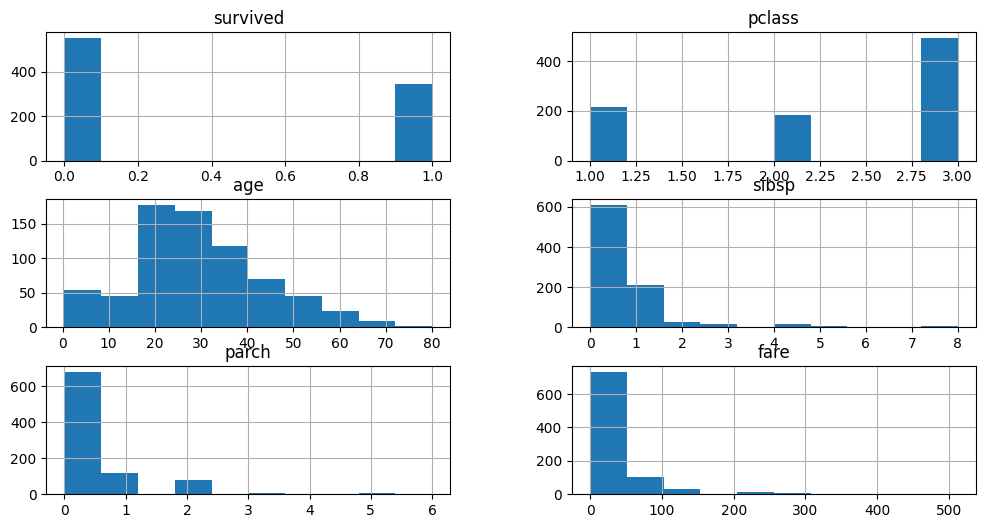

In [661]:
# Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
# Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# Name - Name
# Sex - Sex
# Age - Age
# Sibsp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard
# Ticket - Ticket Number
# Fare - Passenger Fare
# Cabin - Cabin
# Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## ilosc mezczyzn i kobiet
## class
## dzieci
## ktory poklad najlepszy
## {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}

# t.dropna(subset="cabin").groupby(t["cabin"].str[0])['fare'].mean().plot()
t.hist(figsize=(12,6))
# t["cabin"].str[0]
# t

In [109]:
g = t.groupby('pclass').agg({'survived': ['sum', 'count']})
g["Ratio"] = g[('survived', "sum")]/g[('survived', "count")]
g
# t.plot.scatter(x="pclass", y="survived")

survived           Ratio
            sum count          
pclass                         
1           136   216  0.629630
2            87   184  0.472826
3           119   491  0.242363